In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import pandas as pd
import datetime
import matplotlib.pyplot as plt 

def dateparse(time):
    return datetime.datetime.fromtimestamp(float(time)/1000)

data = pd.read_csv('/home/maksym/2021-knu-market/data/[1h]BTCUSDT.csv', parse_dates=['Start', 'Stop'], date_parser=dateparse)

data.head()

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 07:00:00,2017-08-17 07:59:59.999,4261.48,4308.83,4261.32,4313.62,47.181009
1,2017-08-17 08:00:00,2017-08-17 08:59:59.999,4308.83,4315.32,4291.37,4328.69,23.234916
2,2017-08-17 09:00:00,2017-08-17 09:59:59.999,4330.29,4324.35,4309.37,4345.45,7.229691
3,2017-08-17 10:00:00,2017-08-17 10:59:59.999,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 11:00:00,2017-08-17 11:59:59.999,4333.32,4360.69,4333.32,4377.85,0.972807


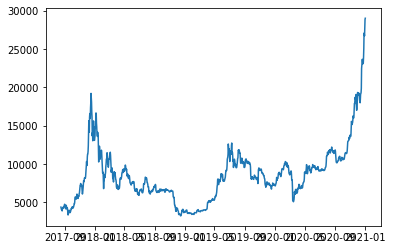

In [3]:
dataOpen = data[['Start','Open']]

dataOpen = dataOpen.set_index('Start')
dataOpen = dataOpen.resample('24H').mean() #Open mean price per day

date = dataOpen.index #list of dates

range_ = pd.RangeIndex(0, len(dataOpen)) 

dataOpen = dataOpen.set_index(range_) 
plt.plot(date, dataOpen) #non-stationary



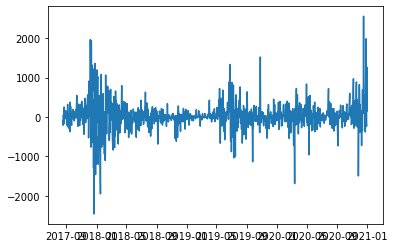

In [4]:
dataOpen_stat = dataOpen.diff(periods=1).dropna() #stationary
plt.plot(date[1:], dataOpen_stat)

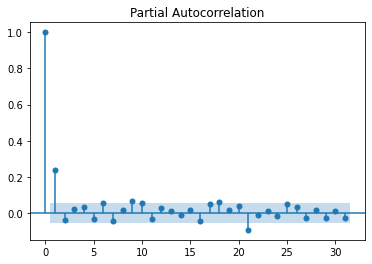

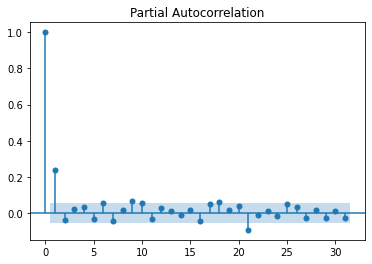

In [5]:
#AR
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(dataOpen_stat)

/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


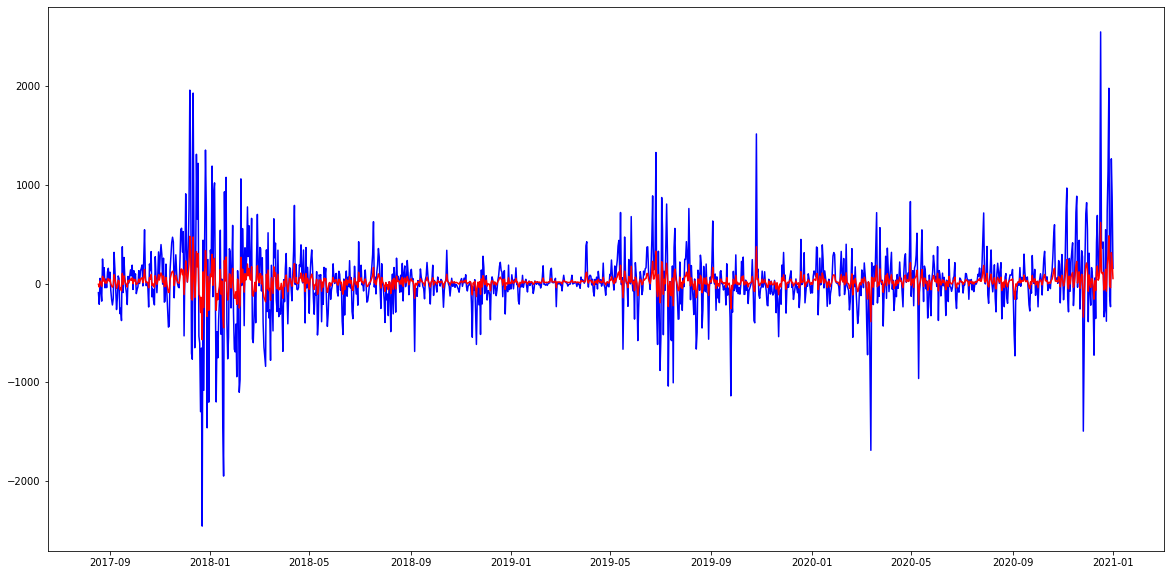

In [6]:
from statsmodels.tsa.ar_model import AutoReg

model_ar = AutoReg(dataOpen_stat, lags=1, old_names=True).fit()

yhat_ar = model_ar.predict(1, len(dataOpen_stat))

plt.figure(figsize=(20,10))
plt.plot(date[1:], dataOpen_stat, 'b')
plt.plot(date[1:], yhat_ar, 'r')


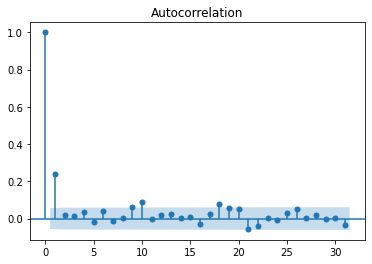

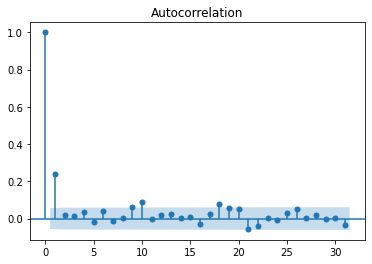

In [47]:
#MA

plot_acf(dataOpen_stat)

/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


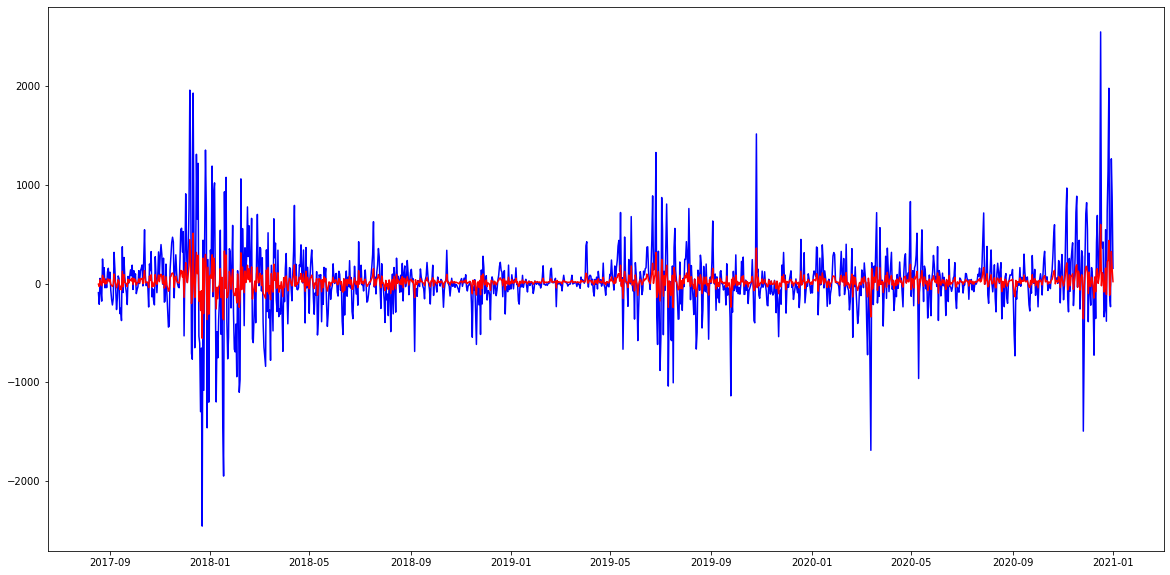

In [7]:
from statsmodels.tsa.arima.model import ARIMA

model_ma = ARIMA(dataOpen_stat, order=(0,0,1)).fit()
yhat_ma = model_ma.predict(1, len(dataOpen_stat))

plt.figure(figsize=(20,10))
plt.plot(date[1:], dataOpen_stat, 'b')
plt.plot(date[1:], yhat_ma, 'r')

/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


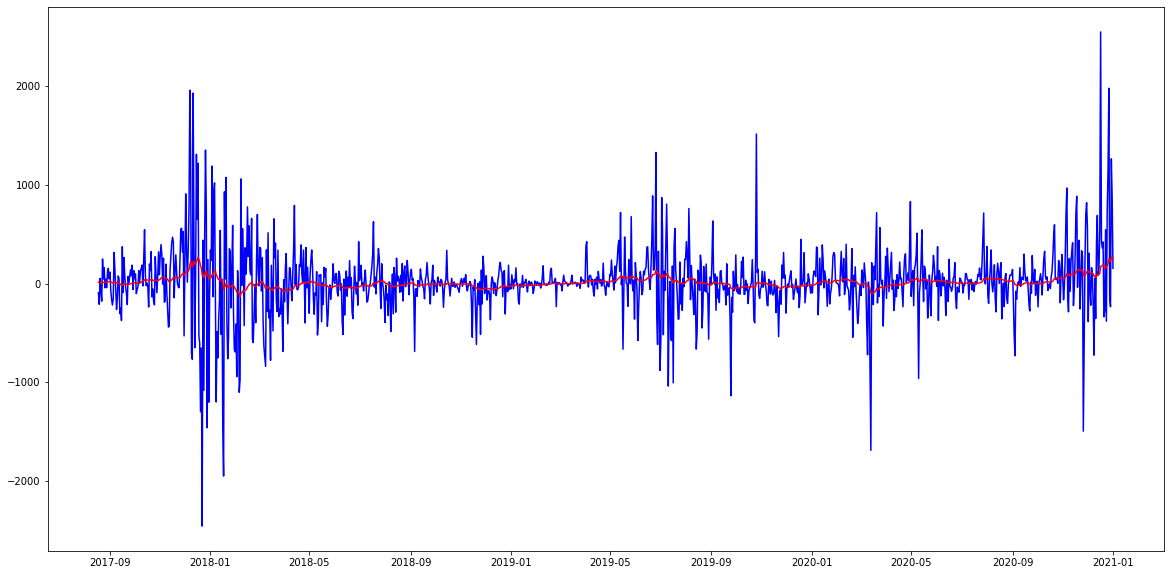

In [12]:
#SES
from statsmodels.tsa.api import SimpleExpSmoothing

model_ses = SimpleExpSmoothing(dataOpen_stat).fit()
yhat_ses = model_ses.predict(1, len(dataOpen_stat))

plt.figure(figsize=(20,10))
plt.plot(date[1:], dataOpen_stat, 'b')
plt.plot(date[1:], yhat_ses, 'r')

/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/maksym/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


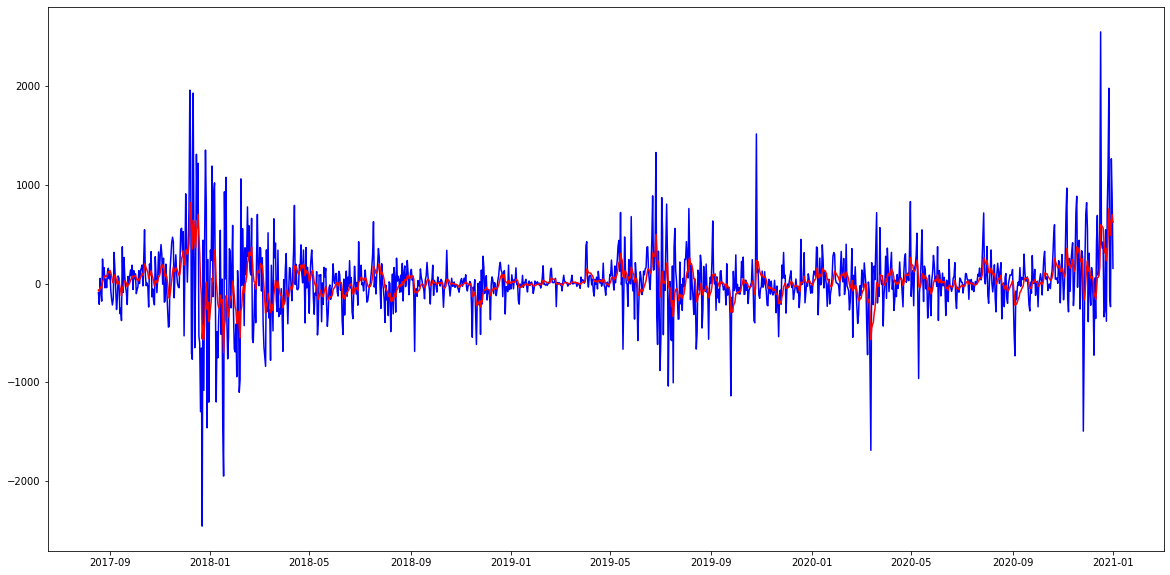

In [29]:
#HWES
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_hwes = ExponentialSmoothing(dataOpen_stat, trend = 'add').fit()
yhat_hwes = model_hwes.predict(1, len(dataOpen_stat))

plt.figure(figsize=(20,10))
plt.plot(date[1:], dataOpen_stat, 'b')
plt.plot(date[1:], yhat_hwes, 'r')

In [32]:
from sklearn.metrics import mean_absolute_error

print('AR mean absolute error : ', mean_absolute_error(dataOpen_stat, yhat_ar))
print('MA mean absolute error : ',  mean_absolute_error(dataOpen_stat, yhat_ma))
print('SES mean absolute error : ', mean_absolute_error(dataOpen_stat, yhat_ses))
print('HWES mean absolute error : ', mean_absolute_error(dataOpen_stat, yhat_hwes))

AR mean absolute error :  156.71772800327523
MA mean absolute error :  158.80554037650782
SES mean absolute error :  199.36957390035357
HWES mean absolute error :  182.0781449506072
